### Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/Module%205-%20Machine%20Learning%20Forecasting/Module5-DT_intuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
data.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [3]:
# Create lag features
data['Lag_1'] = data['Passengers'].shift(1)
data['Lag_2'] = data['Passengers'].shift(2)

data.head()

,Passengers,Lag_1,Lag_2
Month,,,
1949-01,112,NaN,NaN
1949-02,118,112.0,NaN
1949-03,132,118.0,112.0
1949-04,129,132.0,118.0
1949-05,121,129.0,132.0


In [4]:
# Drop NA values created by lag features
data.dropna(inplace=True)
data.head()

,Passengers,Lag_1,Lag_2
Month,,,
1949-03,132,118.0,112.0
1949-04,129,132.0,118.0
1949-05,121,129.0,132.0
1949-06,135,121.0,129.0
1949-07,148,135.0,121.0


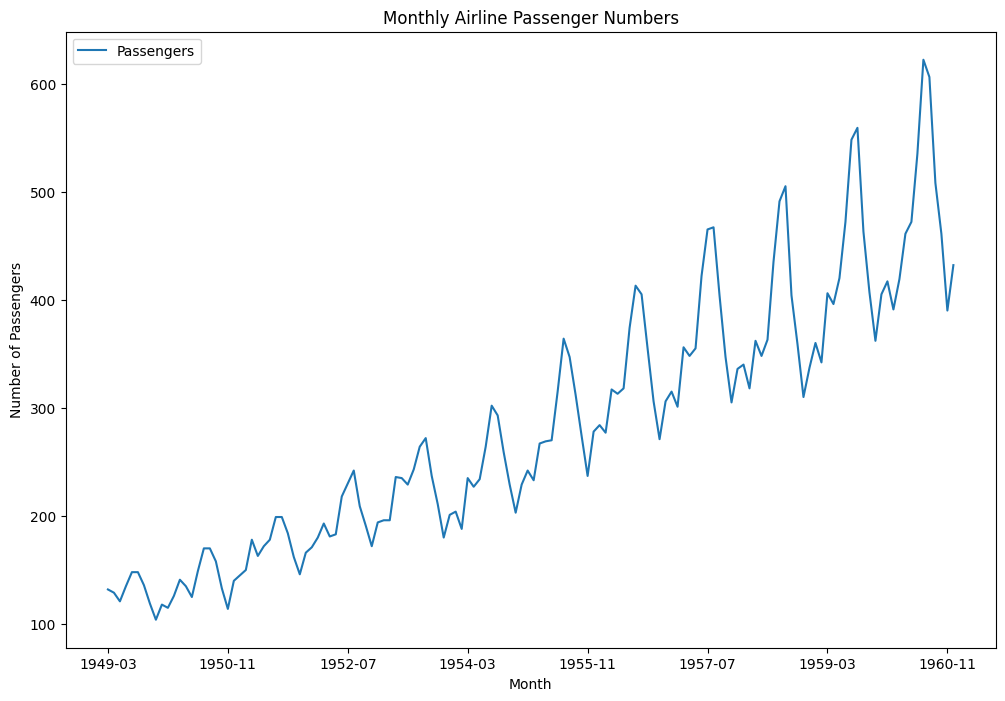

In [5]:
# plot the passenger data
data['Passengers'].plot(figsize=(12, 8))
plt.title('Monthly Airline Passenger Numbers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
plt.show()


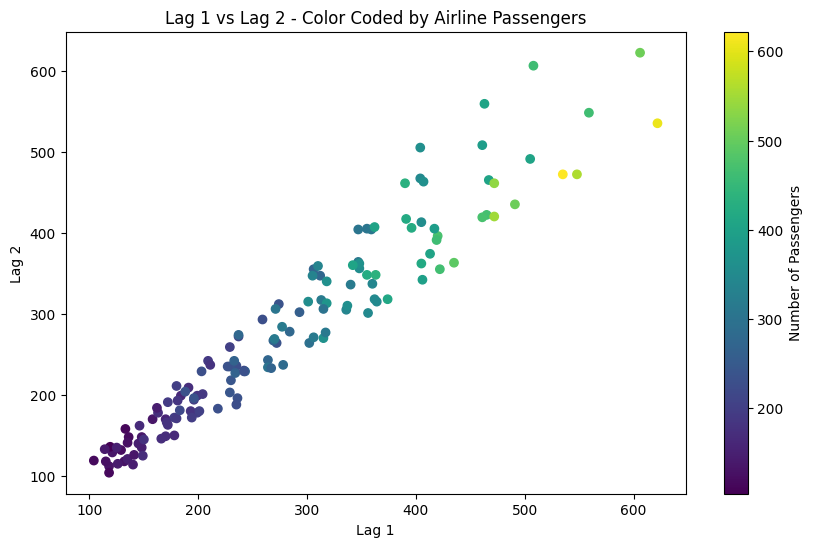

In [6]:
# Plot scatterplot of Lag 1 and Lag 2 color coded by Airline Passengers
plt.figure(figsize=(10, 6))
plt.scatter(data['Lag_1'], data['Lag_2'], c=data['Passengers'], cmap='viridis')
plt.title('Lag 1 vs Lag 2 - Color Coded by Airline Passengers')
plt.xlabel('Lag 1')
plt.ylabel('Lag 2')
plt.colorbar(label='Number of Passengers')
plt.show()

In [7]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Prepare the data for the model
X = data[['Lag_1', 'Lag_2']]
y = data['Passengers']

In [18]:
dt_model = DecisionTreeRegressor(max_depth=2)
dt_model.fit(X, y)


DecisionTreeRegressor(max_depth=2)

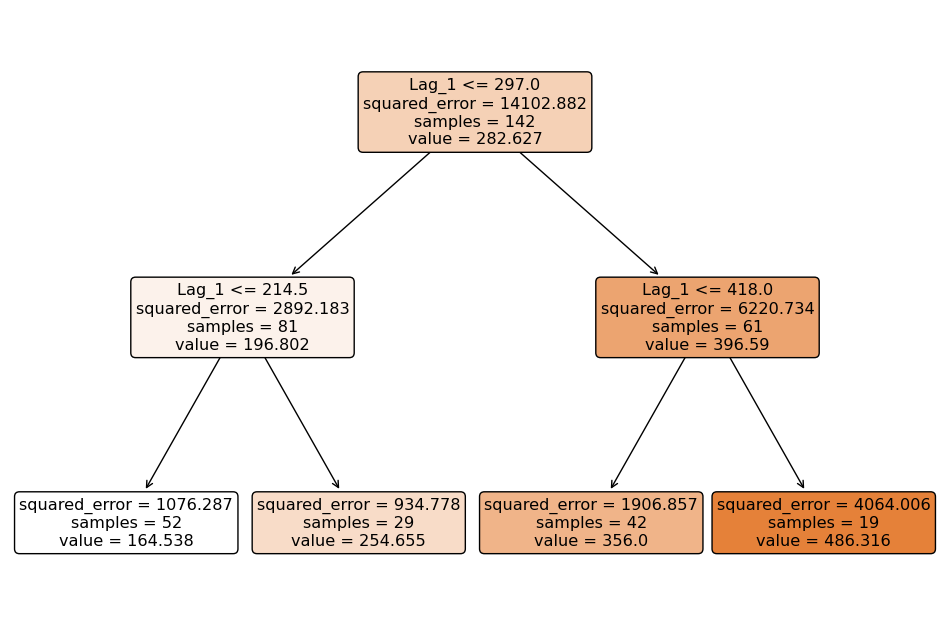

In [19]:
# visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

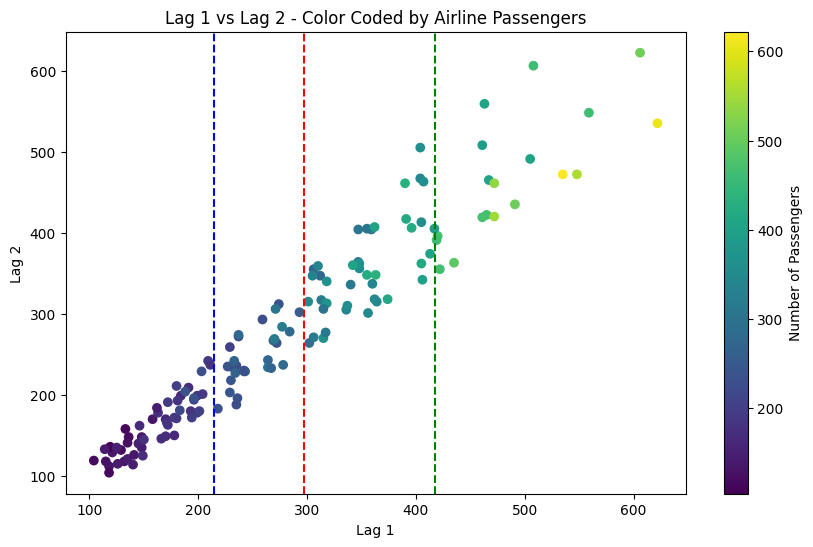

In [20]:
# let's add lag_1 cut off points to the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Lag_1'], data['Lag_2'], c=data['Passengers'], cmap='viridis')

# Add the decision tree cut off points
plt.axvline(x=297, color='red', linestyle='--')
plt.axvline(x=214.5, color='blue', linestyle='--')
plt.axvline(x=418, color='green', linestyle='--')


plt.title('Lag 1 vs Lag 2 - Color Coded by Airline Passengers')
plt.xlabel('Lag 1')
plt.ylabel('Lag 2')
plt.colorbar(label='Number of Passengers')


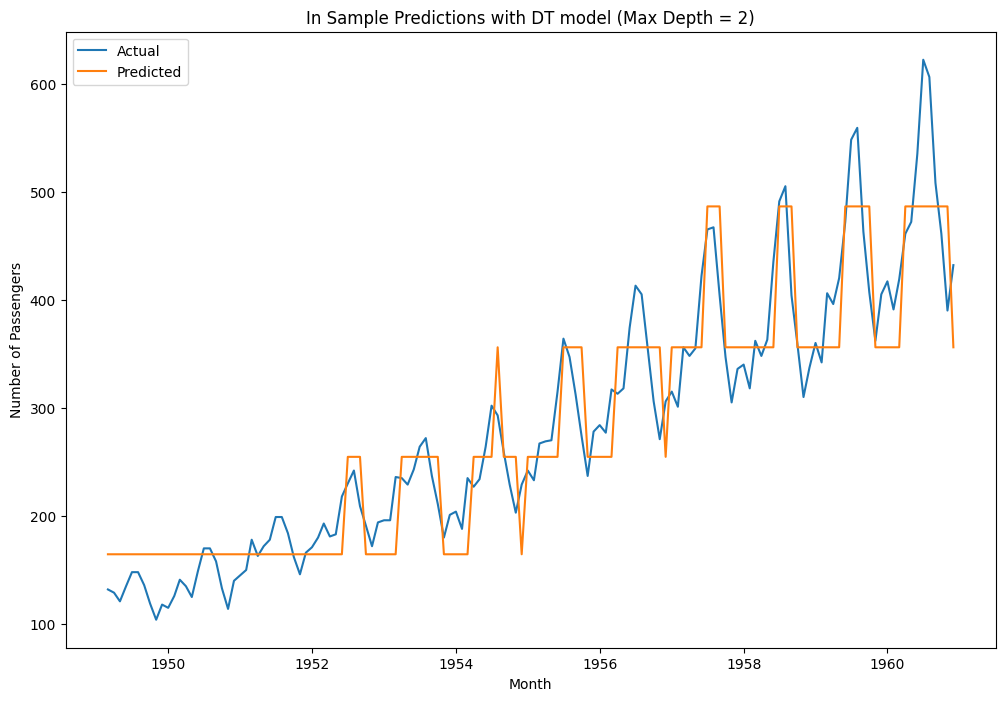

In [21]:
# now let's visualize the in sample predictions
data.index = pd.to_datetime(data.index)

plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Passengers'], label='Actual')
plt.plot(data.index, dt_model.predict(X), label='Predicted')
plt.title(f'In Sample Predictions with DT model (Max Depth = {dt_model.max_depth})')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
